# Analysis of the nationalities

In this notebook, we will analyze the nationalities of the individuals. In Wikidata, the nationalities (P27) are written as "country of citizenship". They are countries and they are many. Here, to facilitate the analysis, we will code the countries into continents.

Also, a person can have more than one nationality. It does not matter, we keep it like this (we remove the individuals with 2 times the same continent coded).

Then, we will compare the nationalities between "economist" and "jurist". We will execute the same process with the gender.

In [171]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

import pprint
import csv
import ast
import re

In [200]:
### install ipywidgets  cf . https://ipywidgets.readthedocs.io/en/latest/user_install.html
from ipywidgets import (
    interact, IntSlider, Checkbox,
    interactive, SelectMultiple, Button)
"""    fixed,
    interactive, Button,
    HTML, Layout,GridspecLayout,
    Output, jslink,
     ColorPicker,
    Text, SelectionRangeSlider,
    FloatRangeSlider, SelectMultiple, Checkbox,
    VBox, HBox
"""

'    fixed,\n    interactive, Button,\n    HTML, Layout,GridspecLayout,\n    Output, jslink,\n     ColorPicker,\n    Text, SelectionRangeSlider,\n    FloatRangeSlider, SelectMultiple, Checkbox,\n    VBox, HBox\n'

In [4]:
import sparql_functions as spqf

In [5]:
### It's define the database ligne to use
pk_query = 101

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [3]:
#print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

In [9]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [10]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

503


In [6]:
# Save the list in the CSV format 
# It is necessary after saving to code all nationalities into continent 
file= 'spreadsheets/nationalities.csv'
with open(file, 'w', newline='') as csvfile:
    writ = csv.writer(csvfile, delimiter='|',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writ.writerow(['nationality', 'freq', 'code'])
    for l in r_query:
        writ.writerow(l)

NameError: name 'r_query' is not defined

In [7]:
# It opens the file with the continent
file= 'spreadsheets/nationalities_coded.csv'
file_cont = []
with open(file, newline='') as csvfile:
    read = csv.reader(csvfile, delimiter='|', quotechar='"')
    for row in read:
        file_cont.append(row)

In [8]:
print(len(file_cont))
file_cont[1:10]

504


[['United States of America', '25500', 'Unite', 'North Am.'],
 ['Germany', '12223', 'Germa', 'Europe'],
 ['Spain', '5396', 'Spain', 'Europe'],
 ['France', '3933', 'Franc', 'Europe'],
 ['United Kingdom', '3853', 'Unite', 'Europe'],
 ['Japan', '3845', 'Japan', 'Asia'],
 ['Poland', '3016', 'Polan', 'Europe'],
 ['Brazil', '2721', 'Brazi', 'South Am.'],
 ['Canada', '2598', 'Canad', 'North Am.']]

In [9]:
# Keep only the nationality and its continent
df_coded_nation = pd.DataFrame(file_cont[1:], columns=['nationality','freq','code', 'continent'])
nat_coded = df_coded_nation[['nationality','continent']]
print(len(nat_coded))
nat_coded.head()

503


,nationality,continent
0,United States of America,North Am.
1,Germany,Europe
2,Spain,Europe
3,France,Europe
4,United Kingdom,Europe


In [15]:
## It's define the database ligne to use
pk_query = 102

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [16]:
#print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

In [17]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [18]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

118874


In [19]:
# Create a dataFrame
df_result_year = pd.DataFrame(r_query)
df_result_year.columns =['uri_entity', 'year', 'nationality']


In [20]:
df_result_year.head()

,uri_entity,year,nationality
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine


In [21]:
# Add the continent of the individuals
merged = pd.merge(df_result_year,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50,]

118874


,uri_entity,year,nationality,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,Canada,North Am.
75943,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,Mexico,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,United States of America,North Am.
82560,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Kingdom of Italy,Europe
80048,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Italy,Europe
...,...,...,...,...
13473,urn:uuid:6ab857e2-2483-4f69-8530-e9bc9f1f71f9,1783,United States of America,North Am.
33884,urn:uuid:6ab96a5f-a592-4ac8-8eeb-a7f1e6721a4f,1943,Germany,Europe
74929,urn:uuid:6ab9b73e-6411-42eb-ac1b-44eed5106a62,1880,Sweden,Europe
24496,urn:uuid:6aba2fd6-3ef1-4ba5-b6d5-dc10f2ad876b,1820,United States of America,North Am.


In [22]:
### drop duplicates
## Each person has one year and one continent 
# (unless if his nationalities are on more than one continent)
coded_nationalities = merged[['uri_entity','year','continent']].drop_duplicates()
print(len(coded_nationalities))
coded_nationalities.sort_values(by=['uri_entity']).loc[30:50,]

110067


,uri_entity,year,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,North Am.
75943,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,North Am.
80048,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Europe
73287,urn:uuid:63d078bb-78af-4b65-ad69-79722434cc39,1906,Europe
...,...,...,...
13473,urn:uuid:6ab857e2-2483-4f69-8530-e9bc9f1f71f9,1783,North Am.
33884,urn:uuid:6ab96a5f-a592-4ac8-8eeb-a7f1e6721a4f,1943,Europe
74929,urn:uuid:6ab9b73e-6411-42eb-ac1b-44eed5106a62,1880,Europe
24496,urn:uuid:6aba2fd6-3ef1-4ba5-b6d5-dc10f2ad876b,1820,North Am.


In [156]:
# Transform into a list
coded_nat_list = coded_nationalities[['year', 'continent']].values.tolist()
coded_nat_list[:10]

[['1959', 'North Am.'],
 ['1927', 'North Am.'],
 ['1955', 'North Am.'],
 ['1927', 'North Am.'],
 ['1827', 'North Am.'],
 ['1860', 'North Am.'],
 ['1873', 'North Am.'],
 ['1882', 'North Am.'],
 ['1900', 'North Am.'],
 ['1933', 'North Am.']]

In [24]:
### Group the list per continent
counter= Counter([t[1] for t in coded_nat_list])
c_coded_nat_list = list(zip(counter.keys(), counter.values()))
sorted_coded_nat_list = sorted(c_coded_nat_list, key=itemgetter(1), reverse=True)
sorted_coded_nat_list

[('Europe', 58426),
 ('North Am.', 29140),
 ('South Am.', 8074),
 ('Asia', 7407),
 ('Middle East', 2594),
 ('Africa', 1994),
 ('Oceania', 1531),
 ('Central Am.', 783),
 ('uncoded', 118)]

In [157]:
### Group in series per continent with the 'groupby' function Pandas
gb_coded_nationalities = coded_nationalities.groupby('continent').size()
gb_coded_nationalities.sort_values(ascending = False)

continent
Europe         58767
North Am.      29204
South Am.       8178
Asia            6901
Middle East     2613
Africa          2000
Oceania         1538
Central Am.      794
uncoded          119
dtype: int64

In [158]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_coded_nat = gb_coded_nationalities.to_frame()
df_coded_nat.columns = ['frequency']
df_coded_nat



,frequency
continent,
Africa,2000
Asia,6901
Central Am.,794
Europe,58767
Middle East,2613
North Am.,29204
Oceania,1538
South Am.,8178
uncoded,119


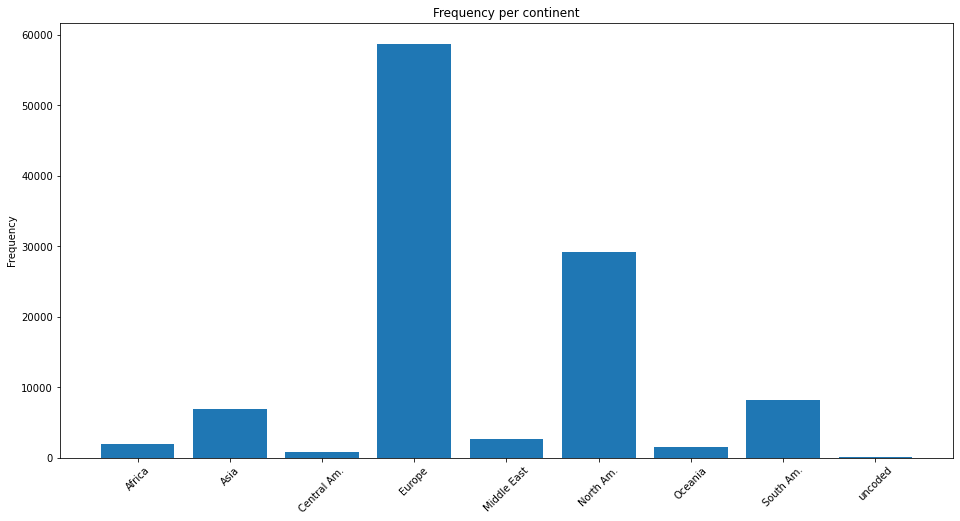

In [159]:
# Distribution per year

objects = [l for l in df_coded_nat.index]
eff = [l for l in df_coded_nat['frequency']]

p1 = plt.bar(objects, eff)

#plt.xticks(l5Years)
plt.ylabel('Frequency')
plt.title('Frequency per continent')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
plt.savefig('exported_pictures/nationalities/Frequency_continent.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()



## Distribution of nationalities over time

Now, we examine the distribution of the nationalities (with the continent) over time (1771 until now).

In [160]:
values_l = [x[0] for x in sorted_coded_nat_list]
values_l

['Europe',
 'North Am.',
 'South Am.',
 'Asia',
 'Africa',
 'Middle East',
 'Oceania',
 'Central Am.',
 'uncoded']

In [248]:
### Transform year into integers
int_coded_nat_list = [[int(l[0]), l[1]] for l in coded_nat_list]
int_coded_nat_list_int=[(l[0]) for l in int_coded_nat_list]
int_coded_nat_list_int.sort()

In [249]:
### Create a list with intervals of 20 years.

def create_years_list(period = 10, y_start = 1791, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [250]:
def interactive_nationality_periods(nationality, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_nat_list # The year must be integers
    for a in nationality:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of nationalities chosen: ', len(output_l))
    print('The other (nationalitiesunchosen): ',len(work_l))
    # print('\n-----')
    
    period = period # 20 10
    y_list = create_years_list(period = period, y_start = 1771, y_end = 2021)
    
    
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('BBB: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]


        for a in nationality:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('AAA: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            # print(bottom_list)

        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per nationality')
        
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [251]:
def interactive_nationality_periods(nationality, period = 10, remaining = False):
        
    output_l = []
    work_l = int_coded_nat_list # The year must be integers
    for a in nationality:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Number of nationalities chosen: ', len(output_l))
    print('The other (nationalitiesunchosen): ',len(work_l))
    # print('\n-----')
    
    period = period # 20 10
    y_list = create_years_list(period = period, y_start = 1771, y_end = 2021)
    
    
    i_list = []
    for i in y_list:
        i_n = 0
        for y in int_coded_nat_list_int:
            if y >= i and y < (i + period):
                i_n += 1
        i_list.append([i, i_n]) 

    periods = [e[0] for e in i_list]
    eff = [e[1] for e in i_list]
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  periods - (period * 20 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('BBB: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]


        for a in nationality:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('AAA: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a )
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            # print(bottom_list)
        
        plt.xticks([i - period / 2 for i in y_list])
        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per nationality')
        plt.title('nationalities per '+ str(period) +' years')
        plt.gcf().set_size_inches(14, 7)
        plt.xticks(rotation=45)
        ax.legend()

        p_out = plt.show()


In [252]:


k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Europe'], # You can chose the continent, you want to visualize (one or more)
    description='Number of nationalities chosen: ',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=10),
    remaining = Checkbox(
    value=False,
    description='The other (nationalities unchosen):',
    disabled=False
))



Number of nationalities chosen:  58767
The other (nationalitiesunchosen):  51347


TypeError: unsupported operand type(s) for -: 'list' and 'float'

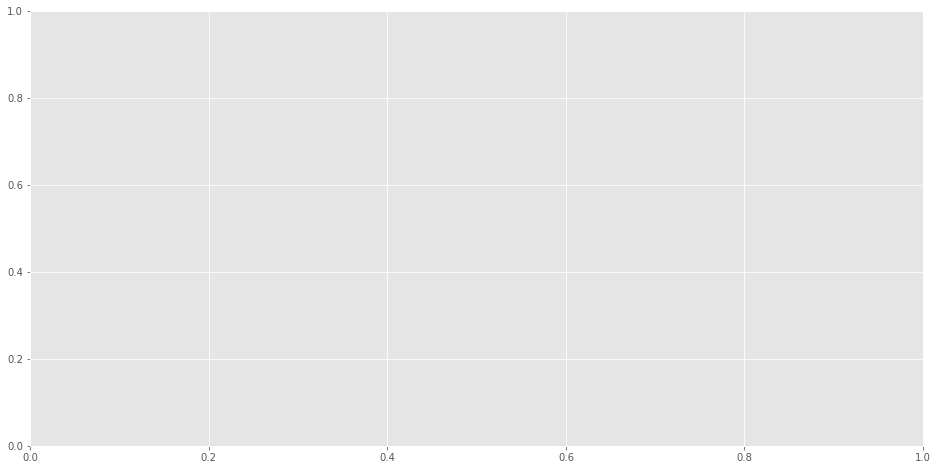

In [253]:
display(k)

In [195]:


k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Asia','Europe', 'North Am.'],
    #rows=10,
    description='Number of nationalities chosen: ',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=20),
    remaining = Checkbox(
    value=False,
    description='The other (nationalities unchosen):',
    disabled=False
))



Number of nationalities chosen:  94872
The other (nationalitiesunchosen):  15242


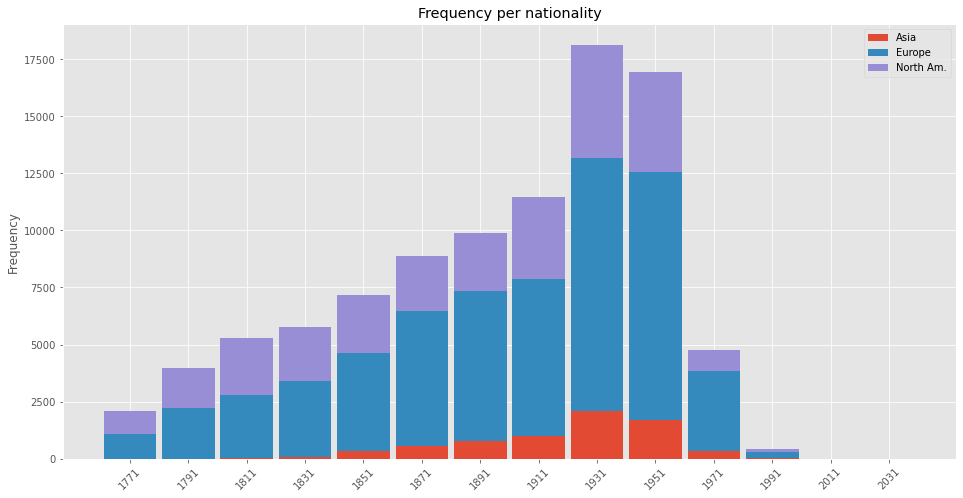

In [196]:
display(k)

## Analysis of the nationalities per occupation

In [ ]:
N

In [34]:
## It's define the database ligne to use
pk_query = 104

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [35]:
#print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

In [36]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [37]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

135918


In [56]:
df_result = pd.DataFrame(r_query)
df_result.columns =['uri_entity', 'year', 'nationality', 'occupation', 'gender']
df_result

,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,lawyer,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,judge,female
3,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist,female
4,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,lawyer,male
...,...,...,...,...,...
135913,urn:uuid:f643e2e7-46c9-4fed-90ce-8c2070ca741a,1875,India,economist,male
135914,urn:uuid:f643e2e7-46c9-4fed-90ce-8c2070ca741a,1875,Dominion of India,lawyer,male
135915,urn:uuid:f643e2e7-46c9-4fed-90ce-8c2070ca741a,1875,Dominion of India,economist,male
135916,urn:uuid:76d4e7fe-6389-43b3-920e-c322122dfa66,1953,United Kingdom,lawyer,male


In [57]:
# change the values of occupations to have only two subpopulations, "economist" and "lawyer".
df_result['occupation'].replace(['lawyer', 'judge', 'magistrate', 'attorney at law', 'advocate', 'legal advocate in France'],'jurist',inplace=True)
df_result['gender'].replace(['transgender male', 'transgender female', 'transfeminine', 'non-binary','intersex'],'other',inplace=True)
df_result[:10]
print(len(df_result))

135918


In [58]:
### drop duplicates
## Each person has one year and one continent 
# (unless if his nationalities are on more than one continent)
df_result_drop = df_result[['uri_entity','year','nationality', 'occupation', 'gender']].drop_duplicates()
print(len(df_result_drop))
df_result_drop[:10]

119081


,uri_entity,year,nationality,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada,economist,male
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America,jurist,male
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany,jurist,female
4,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America,jurist,male
5,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine,economist,male
6,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,1907,United States of America,jurist,male
7,urn:uuid:8b81cd5a-63af-4905-817e-9dcea33ae252,1939,Germany,jurist,male
8,urn:uuid:0a98b4ed-2ecf-4a4f-8250-e405279d4f64,1965,Germany,jurist,male
9,urn:uuid:13dbca6a-92fc-4582-8d38-796577b4c0d0,1864,Hungary,jurist,male
11,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,Canada,jurist,male


In [60]:
# Add the continent of the individuals
merged = pd.merge(df_result_drop,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50]

119081


,uri_entity,year,nationality,occupation,gender,continent
30,urn:uuid:911ecc2a-2777-4f3a-8deb-ec78ee7a4745,1945,Canada,jurist,male,North Am.
50184,urn:uuid:911ee362-3034-426f-aceb-c87ea604d7ba,1904,Greece,jurist,male,Europe
107076,urn:uuid:911f444f-e1e0-4e59-8e55-41b2eb4abebc,1980,Socialist Federal Republic of Yugoslavia,jurist,male,Europe
93161,urn:uuid:911f444f-e1e0-4e59-8e55-41b2eb4abebc,1980,Slovenia,jurist,male,Europe
107908,urn:uuid:911f8fec-1e0c-4a3f-8c56-d7de1a33e632,1922,Norway,jurist,male,Europe
...,...,...,...,...,...,...
14497,urn:uuid:a30d5ae8-a2ef-4237-9f67-9456c230e97f,1831,United States of America,jurist,male,North Am.
88120,urn:uuid:a30d94fd-0f40-4279-bfd5-94b3c00ad379,2000,United Kingdom,jurist,male,Europe
59084,urn:uuid:a30e2360-7449-4b4c-b046-28f1b7277f94,1976,Poland,economist,male,Europe
73544,urn:uuid:a30ec589-10ec-4b3e-a6f8-392730b3fb50,1915,Kingdom of the Netherlands,jurist,male,Europe


In [131]:
coded_nationalities = merged[['uri_entity','year','continent', 'occupation', 'gender']].drop_duplicates()
print(len(merged))
coded_nationalities[:10]

119081


,uri_entity,year,continent,occupation,gender
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.,economist,male
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.,jurist,male
2,urn:uuid:98651569-7301-4398-a760-bcb03931dc0f,1955,North Am.,jurist,male
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.,economist,male
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.,jurist,male
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.,jurist,male
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.,jurist,male
7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.,jurist,male
8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.,jurist,male
9,urn:uuid:9e654a4d-24d5-4c27-8e3c-d6915e0a7fb6,1933,North Am.,jurist,male


In [97]:
### Group in series per continent with the 'groupby' function Pandas
gb_coded_nationalities_occ = coded_nationalities.groupby(['continent','occupation']).size()
gb_coded_nationalities.sort_values(ascending = False)

continent    occupation
Europe       jurist        44559
North Am.    jurist        26594
Europe       economist     14208
South Am.    jurist         6827
Asia         jurist         4371
North Am.    economist      2610
Asia         economist      2530
Middle East  jurist         1930
Africa       jurist         1507
South Am.    economist      1351
Oceania      jurist         1323
Middle East  economist       683
Central Am.  jurist          671
Africa       economist       493
Oceania      economist       215
Central Am.  economist       123
uncoded      jurist           62
             economist        57
dtype: int64

In [98]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_coded_nat_occ = gb_coded_nationalities_occ.to_frame()
df_coded_nat_occ.columns = ['frequency']
df_coded_nat_occ

frequency
continent   occupation           
Africa      economist         493
            jurist           1507
Asia        economist        2530
            jurist           4371
Central Am. economist         123
            jurist            671
Europe      economist       14208
            jurist          44559
Middle East economist         683
            jurist           1930
North Am.   economist        2610
            jurist          26594
Oceania     economist         215
            jurist           1323
South Am.   economist        1351
            jurist           6827
uncoded     economist          57
            jurist             62

In [99]:
continent=("Africa","Asia", "Central Am.", "Europe", "Middle East","North Am.","Oceania","South Am.", "uncoded")
occupation=("economist", "jurist")
index = pd.MultiIndex.from_product(
    [continent, occupation], 
   names=['continent', 'occupation']
)
values = df_coded_nat_occ["frequency"]
data = pd.DataFrame(data={'frequency': values}, index=index).reset_index()
print(data)

      continent occupation  frequency
0        Africa  economist        493
1        Africa     jurist       1507
2          Asia  economist       2530
3          Asia     jurist       4371
4   Central Am.  economist        123
5   Central Am.     jurist        671
6        Europe  economist      14208
7        Europe     jurist      44559
8   Middle East  economist        683
9   Middle East     jurist       1930
10    North Am.  economist       2610
11    North Am.     jurist      26594
12      Oceania  economist        215
13      Oceania     jurist       1323
14    South Am.  economist       1351
15    South Am.     jurist       6827
16      uncoded  economist         57
17      uncoded     jurist         62


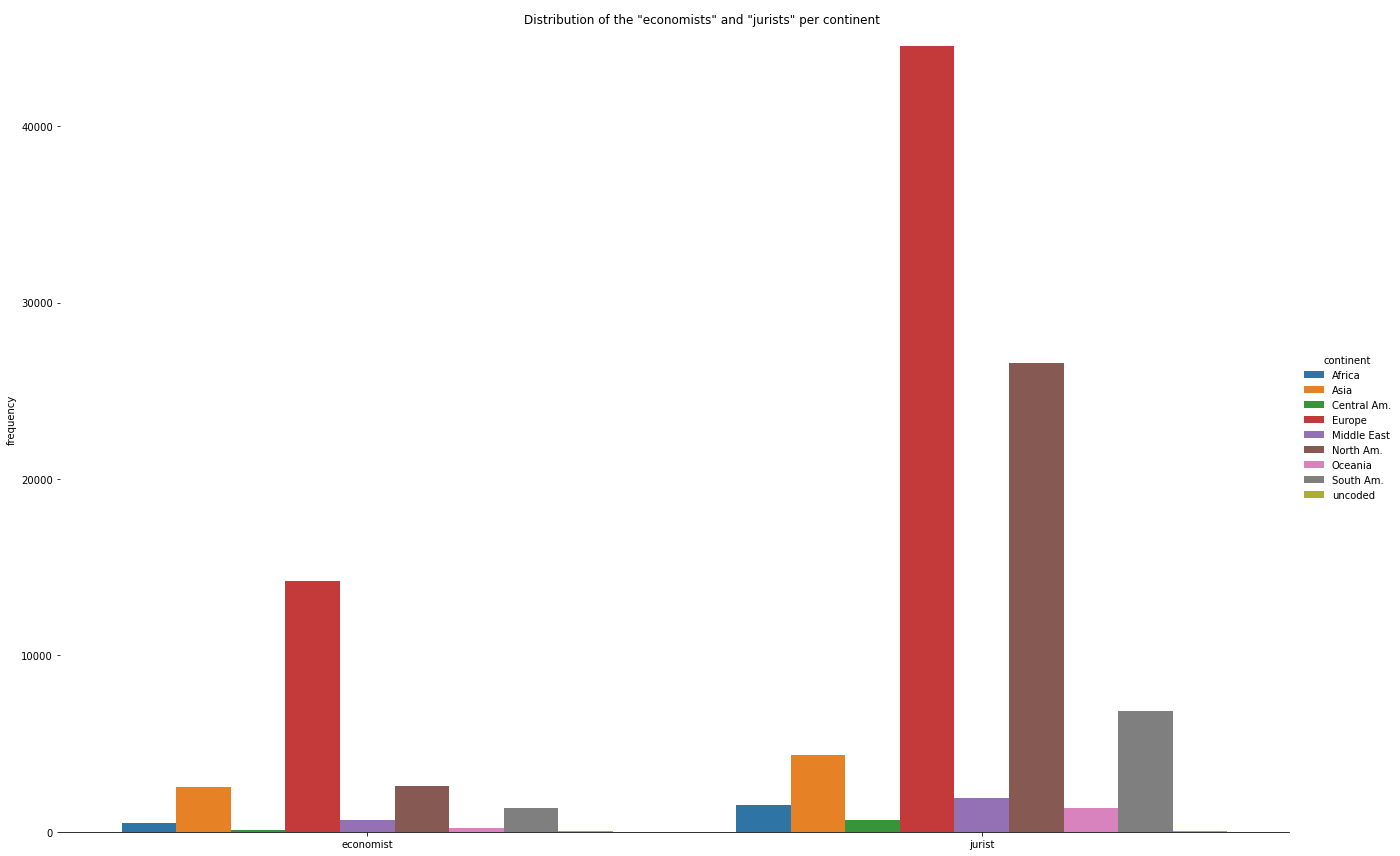

In [121]:
fg = sns.catplot(x='occupation', y='frequency', hue='continent',
                       data=data, kind='bar', height=12,  sharey=False,saturation=.8,  aspect=1.5)
fg.fig.suptitle('Distribution of the "economists" and "jurists" per continent')
fg.despine(left=True)
fg.savefig('exported_pictures/nationalities/distribution_continent_eco_juri.png', dpi=100, bbox_inches = "tight")
fg.set_xlabels('')

## Analysis of the nationalities per gender

In [132]:
gb_coded_nationalities_gender = coded_nationalities.groupby(['continent','gender']).size()
gb_coded_nationalities_gender.sort_values(ascending = False)

continent    gender     
Europe       male           53425
North Am.    male           26532
South Am.    male            7368
Asia         male            6387
Europe       female          5337
North Am.    female          2660
Middle East  male            2294
Africa       male            1607
Oceania      male            1294
South Am.    female           808
Central Am.  male             656
Asia         female           512
Africa       female           392
Middle East  female           319
Oceania      female           243
Central Am.  female           138
uncoded      male             100
             female            19
North Am.    other             11
Europe       other              5
Asia         other              2
South Am.    other              2
North Am.    t1712929763        1
Oceania      other              1
Africa       other              1
dtype: int64

In [134]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_coded_nat_gender = gb_coded_nationalities_gender.to_frame()
df_coded_nat_gender.columns = ['frequency']
df_coded_nat_gender

frequency
continent   gender                
Africa      female             392
            male              1607
            other                1
Asia        female             512
            male              6387
            other                2
Central Am. female             138
            male               656
Europe      female            5337
            male             53425
            other                5
Middle East female             319
            male              2294
North Am.   female            2660
            male             26532
            other               11
            t1712929763          1
Oceania     female             243
            male              1294
            other                1
South Am.   female             808
            male              7368
            other                2
uncoded     female              19
            male               100

In [136]:
continent=("Africa","Asia", "Central Am.", "Europe", "Middle East","North Am.","Oceania","South Am.", "uncoded")
gender=("male", "female")
index = pd.MultiIndex.from_product(
    [continent, gender], 
   names=['continent', 'gender']
)
values = df_coded_nat_gender["frequency"]
data = pd.DataFrame(data={'frequency': values}, index=index).reset_index()
print(data)

      continent  gender  frequency
0        Africa    male       1607
1        Africa  female        392
2          Asia    male       6387
3          Asia  female        512
4   Central Am.    male        656
5   Central Am.  female        138
6        Europe    male      53425
7        Europe  female       5337
8   Middle East    male       2294
9   Middle East  female        319
10    North Am.    male      26532
11    North Am.  female       2660
12      Oceania    male       1294
13      Oceania  female        243
14    South Am.    male       7368
15    South Am.  female        808
16      uncoded    male        100
17      uncoded  female         19


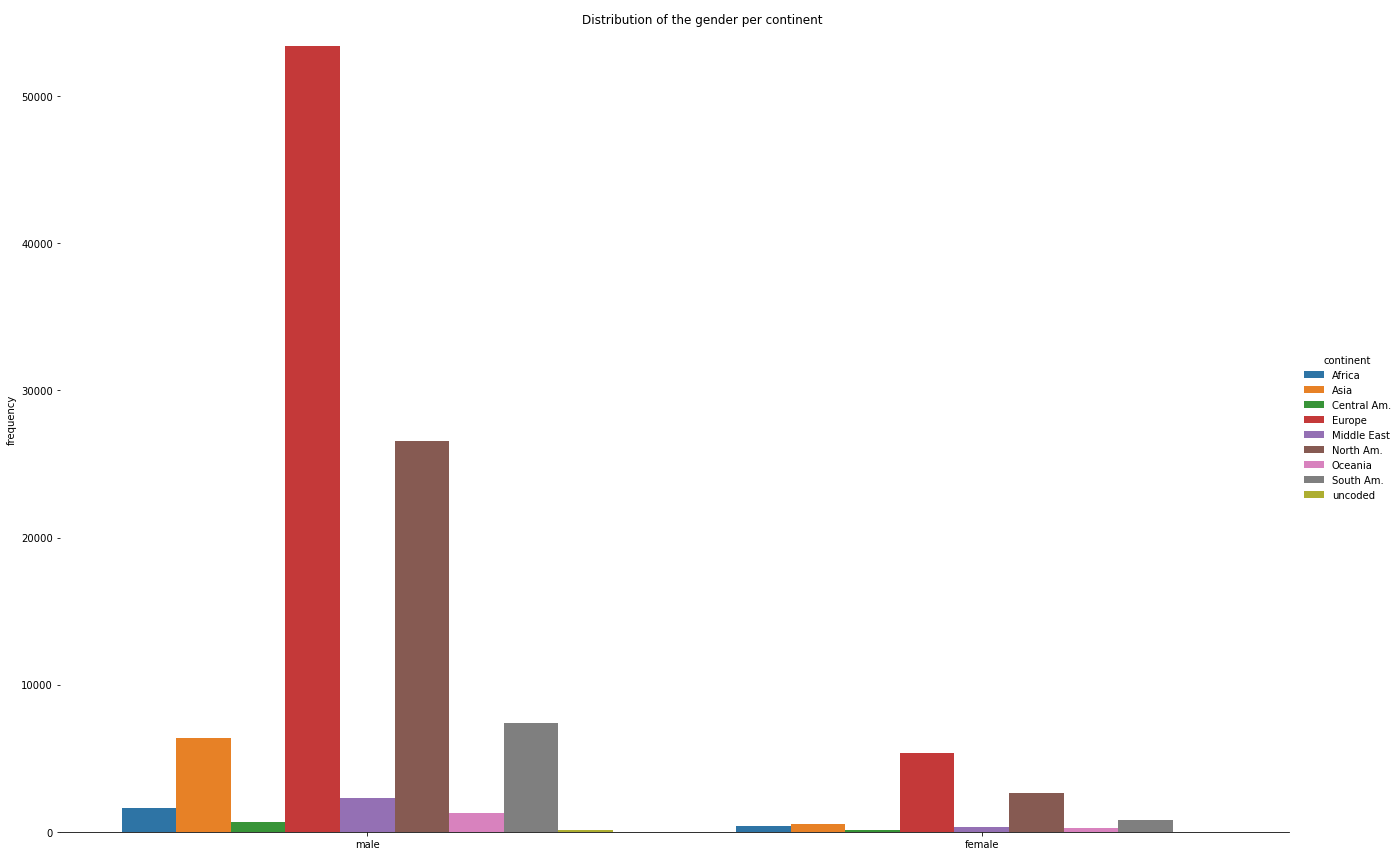

In [137]:
fg = sns.catplot(x='gender', y='frequency', hue='continent',
                       data=data, kind='bar', height=12,  sharey=True, saturation=.8,  aspect=1.5)
fg.fig.suptitle('Distribution of the gender per continent')
fg.despine(left=True)
#fg.savefig('exported_pictures/nationalities/distribution_continent_gender.png', dpi=100, bbox_inches = "tight")
fg.set_xlabels('')

## Analysis of the nationalities per gender and occupation

In [139]:
### Group in series per continent with the 'groupby' function Pandas
nationalities_occ_gend = coded_nationalities.groupby(['continent',"occupation", "gender"]).size()
nationalities_occ_gend.sort_values(ascending = False)

continent    occupation  gender     
Europe       jurist      male           40716
North Am.    jurist      male           24207
Europe       economist   male           12709
South Am.    jurist      male            6154
Asia         jurist      male            3981
Europe       jurist      female          3838
Asia         economist   male            2406
North Am.    jurist      female          2376
             economist   male            2325
Middle East  jurist      male            1659
Europe       economist   female          1499
South Am.    economist   male            1214
Africa       jurist      male            1186
Oceania      jurist      male            1102
South Am.    jurist      female           671
Middle East  economist   male             635
Central Am.  jurist      male             552
Africa       economist   male             421
Asia         jurist      female           389
Africa       jurist      female           320
North Am.    economist   female           2

In [140]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_nat_occ_gend = nationalities_occ_gend.to_frame()
df_nat_occ_gend.columns = ['frequency']
df_nat_occ_gend

frequency
continent   occupation gender                
Africa      economist  female              72
                       male               421
            jurist     female             320
                       male              1186
                       other                1
Asia        economist  female             123
                       male              2406
                       other                1
            jurist     female             389
                       male              3981
                       other                1
Central Am. economist  female              19
                       male               104
            jurist     female             119
                       male               552
Europe      economist  female            1499
                       male             12709
            jurist     female            3838
                       male             40716
                       other                5
Middle East economist  female              48
                       male               635
            jurist     female             271
                       male              1659
North Am.   economist  female             284
                       male              2325
                       other                1
            jurist     female            2376
                       male             24207
                       other               10
                       t1712929763          1
Oceania     economist  female              23
                       male               192
            jurist     female             220
                       male              1102
                       other                1
South Am.   economist  female             137
                       male              1214
            jurist     female             671
                       male              6154
                       other                2
uncoded     economist  female               4
                       male                53
            jurist     female              15
                       male                47

In [145]:
continent=("Africa","Asia", "Central Am.", "Europe", "Middle East","North Am.","Oceania","South Am.", "uncoded")
occupation=("economist", "jurist")
gender=("male", "female")
index = pd.MultiIndex.from_product(
    [continent, 
     occupation, 
     gender], 
   names=['continent', 
          'occupation', 
          "gender"]
)
values = df_nat_occ_gend["frequency"]
data = pd.DataFrame(data={'frequency': values}, index=index).reset_index()
print(data)

      continent occupation  gender  frequency
0        Africa  economist    male        421
1        Africa  economist  female         72
2        Africa     jurist    male       1186
3        Africa     jurist  female        320
4          Asia  economist    male       2406
5          Asia  economist  female        123
6          Asia     jurist    male       3981
7          Asia     jurist  female        389
8   Central Am.  economist    male        104
9   Central Am.  economist  female         19
10  Central Am.     jurist    male        552
11  Central Am.     jurist  female        119
12       Europe  economist    male      12709
13       Europe  economist  female       1499
14       Europe     jurist    male      40716
15       Europe     jurist  female       3838
16  Middle East  economist    male        635
17  Middle East  economist  female         48
18  Middle East     jurist    male       1659
19  Middle East     jurist  female        271
20    North Am.  economist    male

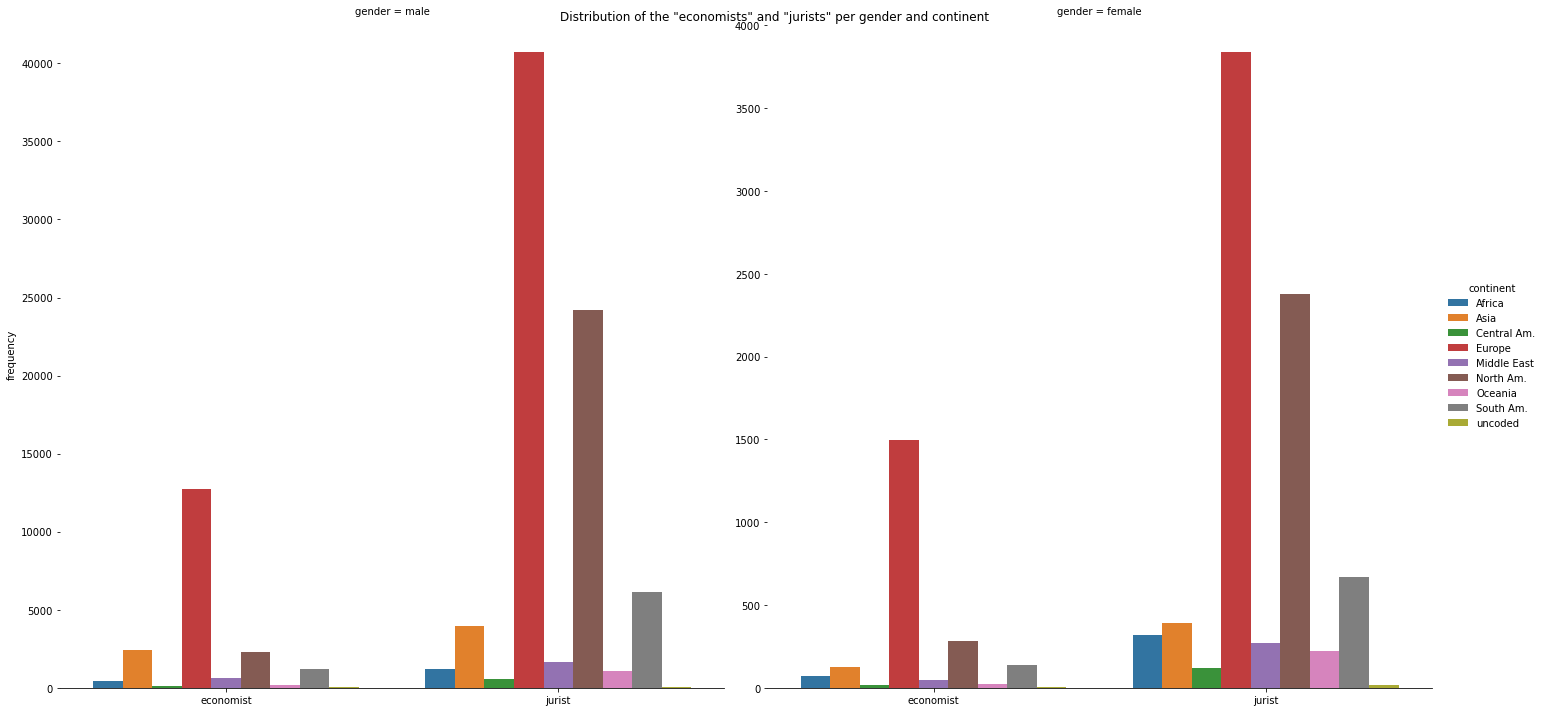

In [149]:
fg = sns.catplot(x='occupation', y='frequency', hue='continent', col="gender",
                       data=data, kind='bar', height=10, aspect=1,  sharey=False)

fg.fig.suptitle('Distribution of the "economists" and "jurists" per gender and continent')
fg.despine(left=True)
#fg.savefig('exported_pictures/nationalities/distribution_continent_eco_juri_gend.png', dpi=100, bbox_inches = "tight")
fg.set_xlabels('')

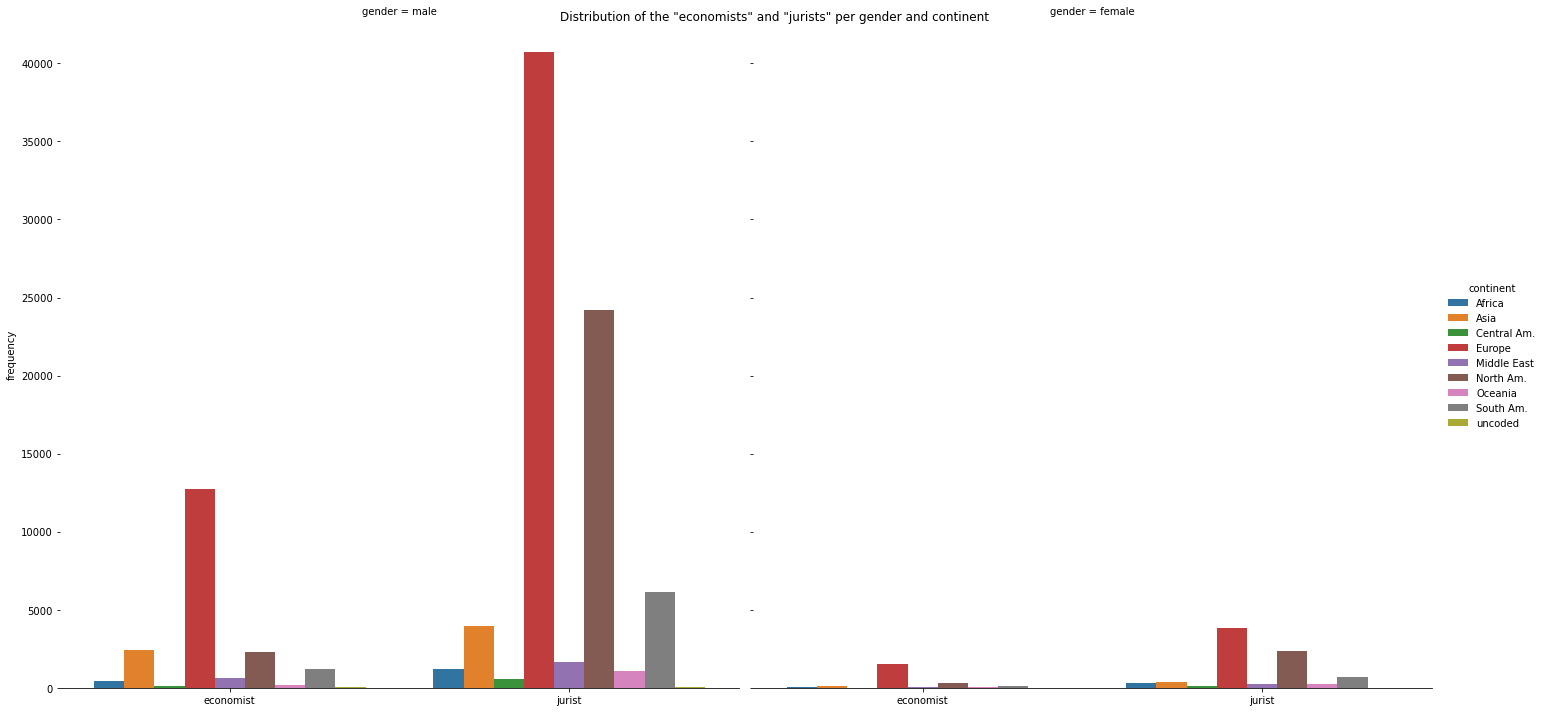

In [151]:
fg1 = sns.catplot(x='occupation', y='frequency', hue='continent', col="gender",
                       data=data, kind='bar', height=10, aspect=1,  sharey=True)

fg1.fig.suptitle('Distribution of the "economists" and "jurists" per gender and continent')
fg1.despine(left=True)
#fg1.savefig('exported_pictures/nationalities/distribution_continent_eco_juri_gend.png', dpi=100, bbox_inches = "tight")
fg1.set_xlabels('')